In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer,MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

# Assuming 'data' is your DataFrame
data = pd.read_csv('HouseListings-Top45Cities-10292023-kaggle.csv', encoding='latin1')

# Drop rows with missing values
data = data.dropna()
low, high = data['Price'].quantile([0.05, 0.95])
mask_area = data['Price'].between(low, high)
data = data[mask_area]
# Filter entries for Ontario
ontario_data = data[data['Province'] == 'Ontario']

# Specify cities to remove from Ontario
cities_to_remove = ['Regina', 'Saskatoon', 'Nanaimo']

# Remove specified cities from Ontario in the original DataFrame
ontario_data_filtered = ontario_data[~ontario_data['City'].isin(cities_to_remove)]


ontario_data_filtered = ontario_data_filtered.drop(['Address','Province'],axis =1)

ontario_data_filtered
ontario_encoded_data = pd.get_dummies(ontario_data_filtered, columns=['City'], prefix='City')
ontario_encoded_data
def logictobinary(df):
    return df.applymap(lambda x: 1 if x == True else (0 if x == False else x))
ontario_encoded_data = logictobinary(ontario_encoded_data)

In [3]:
X =ontario_encoded_data.drop(['Price'],axis=1)
y = ontario_encoded_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [4]:
train_data = X_train.join(y_train)


<Axes: >

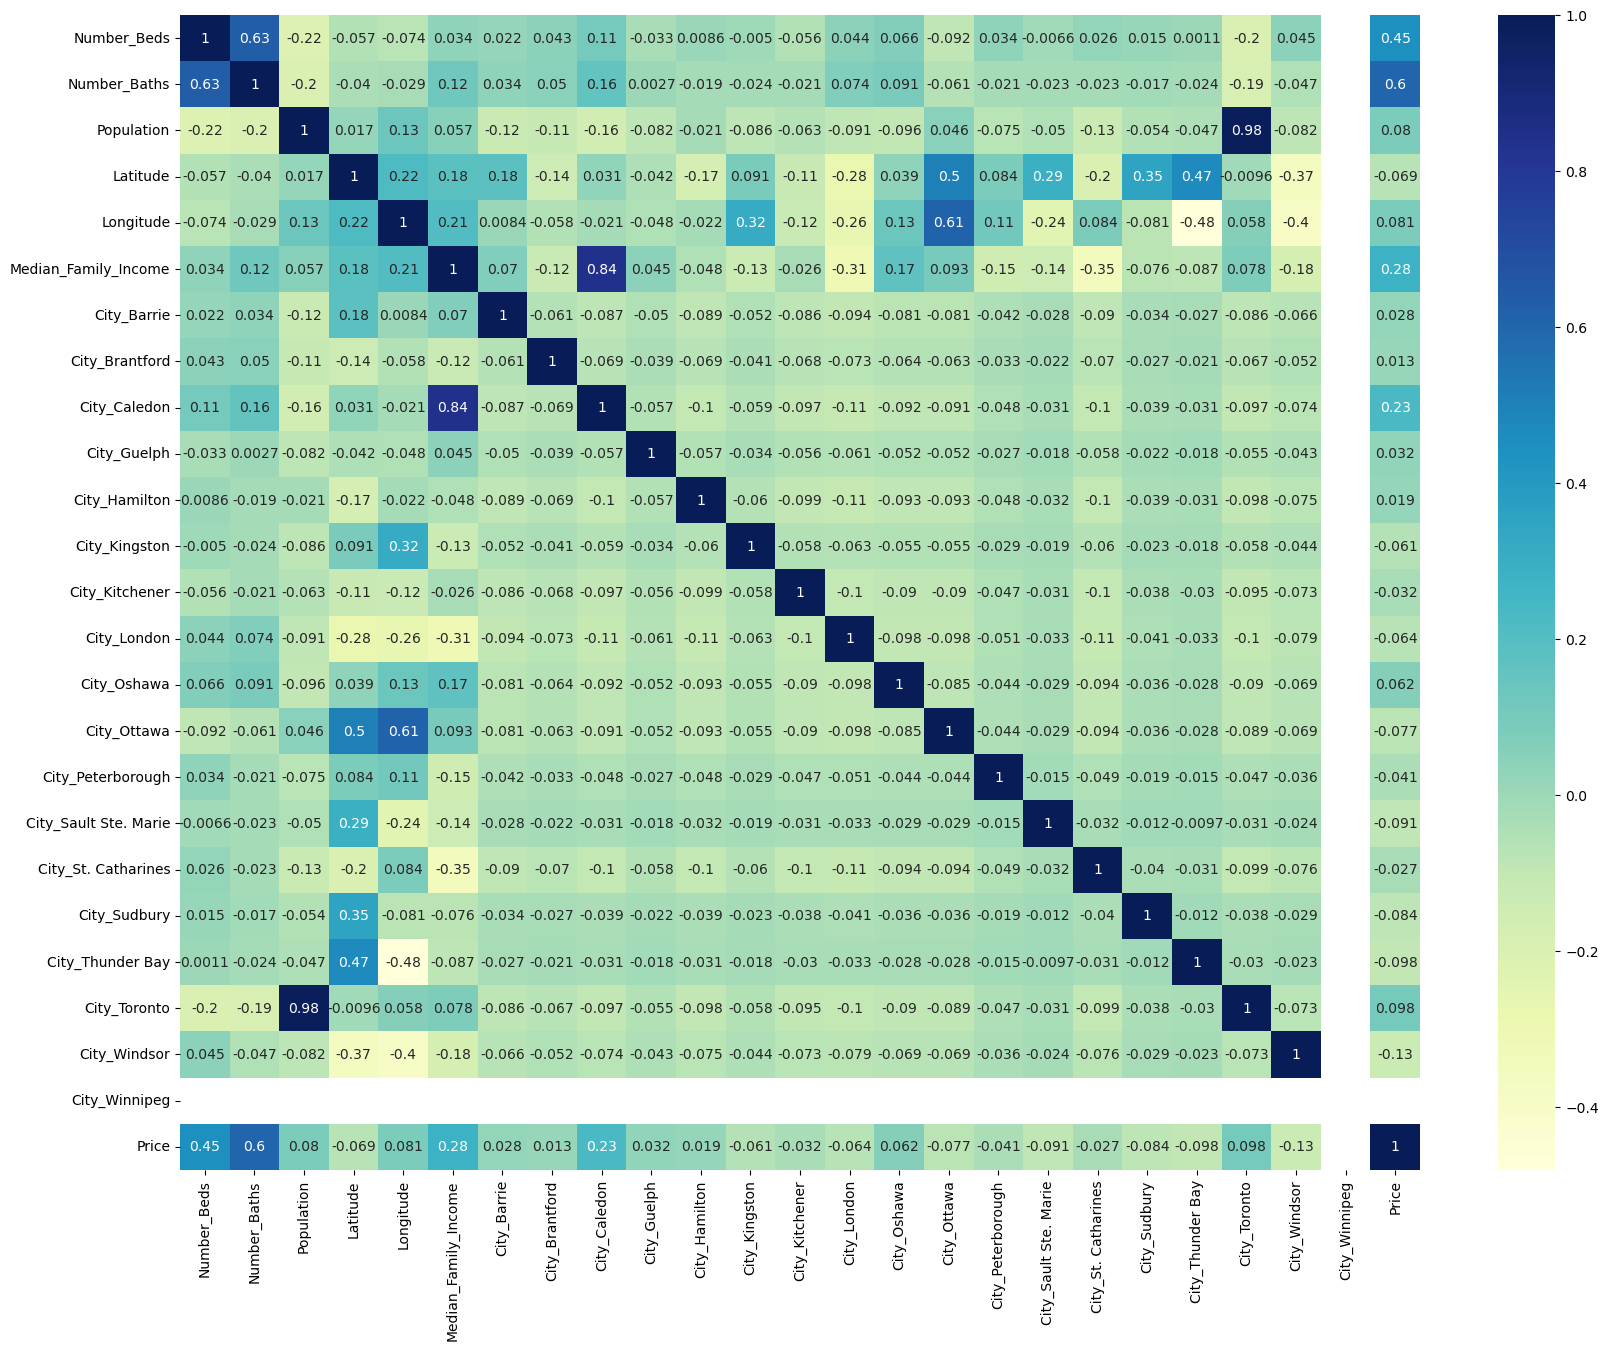

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

array([[<Axes: title={'center': 'Number_Beds'}>,
        <Axes: title={'center': 'Number_Baths'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Median_Family_Income'}>,
        <Axes: title={'center': 'City_Barrie'}>,
        <Axes: title={'center': 'City_Brantford'}>,
        <Axes: title={'center': 'City_Caledon'}>,
        <Axes: title={'center': 'City_Guelph'}>],
       [<Axes: title={'center': 'City_Hamilton'}>,
        <Axes: title={'center': 'City_Kingston'}>,
        <Axes: title={'center': 'City_Kitchener'}>,
        <Axes: title={'center': 'City_London'}>,
        <Axes: title={'center': 'City_Oshawa'}>],
       [<Axes: title={'center': 'City_Ottawa'}>,
        <Axes: title={'center': 'City_Peterborough'}>,
        <Axes: title={'center': 'City_Sault Ste. Marie'}>,
        <Axes: title={'center': 'City_St. Catharines'}>,
        <Axes: title={'cent

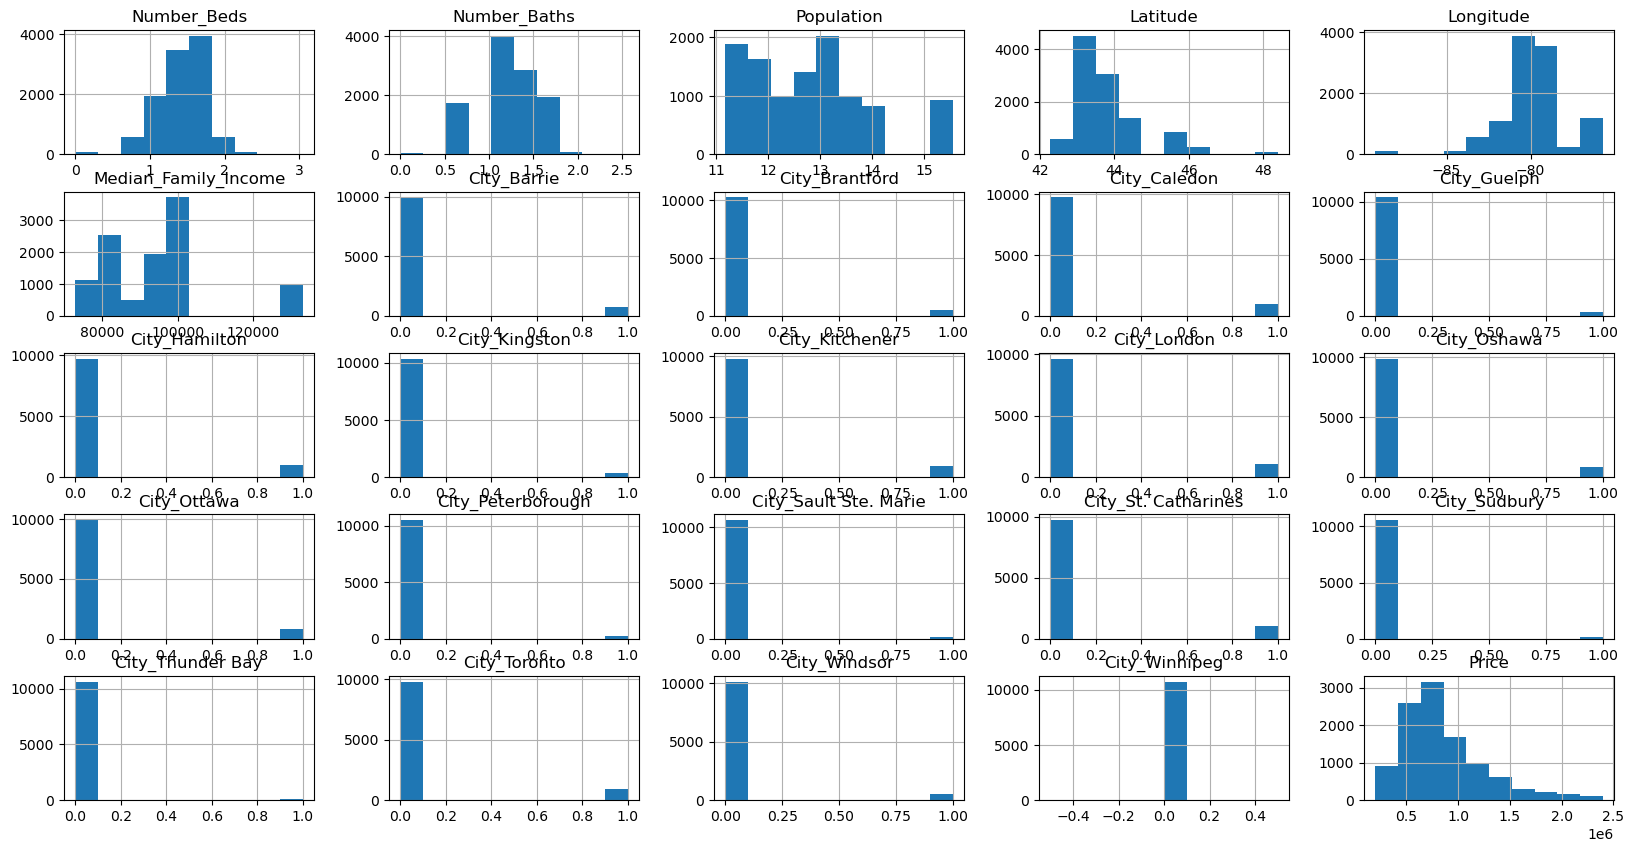

In [6]:
train_data['Number_Beds'] = np.log(train_data['Number_Beds']+1)
train_data['Number_Baths'] = np.log(train_data['Number_Baths']+1)

train_data['Population'] = np.log(train_data['Population']+1)
train_data.hist(figsize=(20,10))


In [7]:
from sklearn.linear_model import LinearRegression

X_train , y_train = train_data.drop(['Price'],axis=1),train_data['Price']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [8]:
test_data = X_test.join(y_test)
test_data['Number_Beds'] = np.log(test_data['Number_Beds']+1)
test_data['Population'] = np.log(test_data['Population']+1)
test_data['Number_Baths'] = np.log(test_data['Number_Baths']+1)

In [9]:
X_test , y_test = test_data.drop(['Price'],axis=1),test_data['Price']


In [10]:
reg.score(X_test, y_test)

0.43471227969133397

In [11]:
from sklearn.ensemble import RandomForestRegressor 
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [12]:
forest.score(X_test, y_test)

0.4936340016579306

In [16]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,200,300],
    'min_samples_split' : [2,4],
    'max_depth':[None,4,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [14]:
grid_search.best_estimator_

In [15]:
best_forest.score(X_test,y_test)

0.49480340863552974